#  Self Study 3

In this self study we perform character recognition using SVM classifiers. We use the MNIST dataset, which consists of 70000 handwritten digits 0..9 at a resolution of 28x28 pixels. 

Stuff we need:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from skimage.transform import rescale, resize
#from sklearn.datasets import fetch

Now we get the MNIST data. Using the fetch_mldata function, this will be downloaded from the web, and stored in the directory you specify as data_home (replace my path in the following cell):

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784', data_home='/home/jaeger/Data')

The data has .data and .target attributes. The following gives us some basic information on the data:

In [3]:
print("Number of datapoints: {}\n".format(mnist.data.shape[0]))
print("Number of features: {}\n".format(mnist.data.shape[1]))
print("List of labels: {}\n".format(np.unique(mnist.target)))

Number of datapoints: 70000

Number of features: 784

List of labels: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']



The mnist.data is represented as a Pandas dataframe. The following code expects mnist.data to be a plain np.array, which we get simply by running:

In [4]:
mnist.data=np.array(mnist.data)

We can plot individual datapoints as follows:

Value of datapoint no. 4:
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 

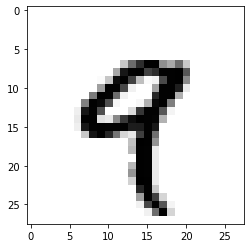

In [5]:
index = 4
print("Value of datapoint no. {}:\n{}\n".format(index,mnist.data[index]))
print("As image:\n")
plt.imshow(mnist.data[index].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()

To make things a little bit simpler (and faster!), we can extract from the data binary subsets, that only contain the data for two selected digits:

The first datapoint now is: 



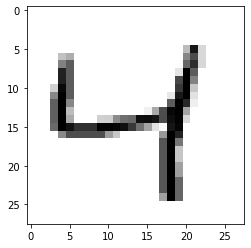

Number of datapoints: 14117



In [6]:
digit0='4'
digit1='7'
mnist_bin_data=mnist.data[np.logical_or(mnist.target==digit0,mnist.target==digit1)]
mnist_bin_target=mnist.target[np.logical_or(mnist.target==digit0,mnist.target==digit1)]
print("The first datapoint now is: \n")
plt.imshow(mnist_bin_data[0].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()
print("Number of datapoints: {}\n".format(len(mnist_bin_data)))


**Exercise 1:** Split the mnist_bin data into training and test set. Learn different SVM models by varying the kernel functions (SVM). For each configuration, determine the time it takes to learn the model, and the accuracy on the test data. 

You can get the current time using:

`import time` <br>
`now = time.time()`

*Caution*: for some configurations, learning here can take a little while (several minutes).

Using the numpy where() function, one can extract the indices of the test cases that were misclassified: <br>
`misclass = np.where(test != predictions)` <br>
Inspect some misclassified cases. Do they correspond to hard to recognize digits (also for the human reader)? 

How do results (time and accuracy) change, depending on whether you consider an 'easy' binary task (e.g., distinguishing '1' and '0'), or a more difficult one (e.g., '4' vs. '5'). 

Identify one or several good configurations that give a reasonable combination of accuracy and runtime. Use these configurations to perform a full classification of the 10 classes in the original dataset (after split into train/test). Using `sklearn.metrics.confusion_matrix` you can get an overview of all combinations of true and predicted labels. What does this tell you about which digits are easy, and which ones are difficult to recognize, and which ones are most easily confused?

In [7]:
is_all_data = False
mnist_bin = lambda : None
if is_all_data:
    mnist_bin.data = mnist.data
    mnist_bin.target = mnist.target
else:
    mnist_bin.data = mnist_bin_data
    mnist_bin.target = mnist_bin_target

data_training, data_test, target_training, target_test = sklearn.model_selection.train_test_split(mnist_bin.data, mnist_bin.target, test_size=0.30, train_size=0.70, random_state=None, shuffle=True, stratify=None)

print(len(data_training), len(data_test))
print(len(target_training), len(target_test))

mnist_bin.data_training = data_training
mnist_bin.data_test = data_test
mnist_bin.target_training = target_training
mnist_bin.target_test = target_test

9881 4236
9881 4236


In [8]:
kernels = ['linear', 'rbf', 'poly']

def calculate_kernel_time(kernel_id):
    start_time = time.time()

    model = SVC(kernel=kernel_id)

    print(mnist_bin.data_training.shape)
    model.fit(mnist_bin.data_training, mnist_bin.target_training)

    end_time = time.time()
    return end_time - start_time, model

def get_train_acc(model):
    return sklearn.metrics.accuracy_score(mnist_bin.target_training, model.predict(mnist_bin.data_training))

def get_test_acc(model):
    return sklearn.metrics.accuracy_score(mnist_bin.target_test, model.predict(mnist_bin.data_test))

for kernel in kernels:
    linear_time_diff, model = calculate_kernel_time(kernel)
    train_acc = get_train_acc(model)
    accuracy = get_test_acc(model)
    print(f"{kernel}:: Time difference: {linear_time_diff} sec; Train Accuracy: {train_acc}; Test Accuracy: {accuracy}")

    conf_matrix = confusion_matrix(mnist_bin.target_test, model.predict(mnist_bin.data_test))
    print(conf_matrix)

    

(9881, 784)
linear:: Time difference: 3.35465407371521 sec; Train Accuracy: 1.0; Test Accuracy: 0.983947119924457
[[2029   35]
 [  33 2139]]
(9881, 784)
rbf:: Time difference: 3.958343982696533 sec; Train Accuracy: 0.9972674830482745; Test Accuracy: 0.9974032105760151
[[2062    2]
 [   9 2163]]
(9881, 784)
poly:: Time difference: 3.9288153648376465 sec; Train Accuracy: 0.9986843436899099; Test Accuracy: 0.997639282341832
[[2061    3]
 [   7 2165]]


**Exercise 2:** In the experiments done in Exercise 1 you applied generic "off-the-shelf" kernels to the original data representation given by a 28 x 28 matrix. Can you think of other data transformations that are more directly targeted at constructing features that are informative for the character recognition task (remember e.g. the exercise from last week to construct features for making the x-or data linearly separable)? You should consider the following two approaches:<br>

**a)** Manually design feature functions for which you expect that based on your new features SVM classifiers can achieve a better accuracy than with the original features (ideally, given the new features, only a linear SVM then is needed). Transform the data into your new feature space, and learn new classifiers. What accuracies do you get? It is not expected that you get higher accuracies than with the best SVM from Exercise 1. What you should aim for is that you get better accuracies when you apply a linear SVM to your transformed data, than when you apply a linear SVM to the original data.

**b)** Instead of designing an explicit feature mapping as in **a)**, define a suitable measure of similarity for the digits, and implement that measure as a kernel function. (Optional: verify that the function you have defined actually satisfies the positive-semidefiniteness property.) Use your kernel function as a custom kernel for the SVC classifier.  See http://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html#sphx-glr-auto-examples-svm-plot-custom-kernel-py for an example.

In [9]:
# print(mnist_bin.data_training[0].shape)
# print(resize(mnist_bin.data_training[0], (32, 32), anti_aliasing=True).shape)

# print(mnist_bin.data_training.shape)
# print(mnist_bin.data_test.shape)
# mnist_bin.data_training = np.array([resize(image, (32, 32), anti_aliasing=True) for image in mnist_bin.data_training])
# mnist_bin.data_test = np.array([resize(image, (32, 32), anti_aliasing=True) for image in mnist_bin.data_test])

# mnist_bin.data_training = mnist_bin.data_training.reshape(-1, 1024)
# mnist_bin.data_test = mnist_bin.data_test.reshape(-1, 1024)

# print(mnist_bin.data_training.shape)
# print(mnist_bin.data_test.shape)

# for kernel in kernels:
#     linear_time_diff, model = calculate_kernel_time(kernel)
#     train_acc = get_train_acc(model)
#     accuracy = get_test_acc(model)
#     print(f"{kernel}:: Time difference: {linear_time_diff} sec; Train Accuracy: {train_acc}; Test Accuracy: {accuracy}")

#     conf_matrix = confusion_matrix(mnist_bin.target_test, model.predict(mnist_bin.data_test))
#     print(conf_matrix)

In [11]:
def squared_kernel(X, Y):
    return np.dot(X, Y.T)**2

model = SVC(kernel=squared_kernel)
model.fit(mnist_bin.data_training, mnist_bin.target_training)

train_acc = get_train_acc(model)
accuracy = get_test_acc(model)

print(f"{kernel}:: Time difference: {linear_time_diff} sec; Train Accuracy: {train_acc}; Test Accuracy: {accuracy}")

conf_matrix = confusion_matrix(mnist_bin.target_test, model.predict(mnist_bin.data_test))
print(conf_matrix)

poly:: Time difference: 3.9288153648376465 sec; Train Accuracy: 1.0; Test Accuracy: 0.9978753541076487
[[2062    2]
 [   7 2165]]


In [12]:
def best_kernel(X, Y, gamma=0.5):
    K = np.zeros((X.shape[0], Y.shape[0]))
    for i, x in enumerate(X):
        for j, y in enumerate(Y):
            K[i, j] = np.exp(-gamma * np.linalg.norm(x - y) ** 2)
    return K

model = SVC(kernel=best_kernel)
model.fit(mnist_bin.data_training, mnist_bin.target_training)

train_acc = get_train_acc(model)
accuracy = get_test_acc(model)

print(f"{kernel}:: Time difference: {linear_time_diff} sec; Train Accuracy: {train_acc}; Test Accuracy: {accuracy}")

conf_matrix = confusion_matrix(mnist_bin.target_test, model.predict(mnist_bin.data_test))
print(conf_matrix)

KeyboardInterrupt: 